# Problem (1)

## (a)
Write a computer program that simulates an M/M/1 queue. (IMPORTANT: To
“simulate” a queue you should NOT directly use the M/M/1 formula that we derived in
the class. Rather, your program should emulate the timing of packet-by-packet arrivals
and services in the queue. Then, you should collect the statistics from your simulation
in order to answer the following problems. You may want to compare your collected
statistics with the M/M/1 formula to verify whether your simulation is correct. Further,
you may want to discard the data at the begining of the simulation because the queue
may not have reached steady-state yet.)

In [1]:
import random
import math
import statistics
import matplotlib.pyplot as plt

# Ryan is happy

#simulation variables
temp_res = 1000 # temporal resolution
total_duration = 10000
times = []

# arrival variables
_lambda = 8.0
arrival_time = 0
departure_time = 0
arrival_times = [] # arrival_times[i] stores the time at i'th arrival
departure_times = [] # departure_times[i] stores the time at i'th departure
inter_arrival_times = [] # inter_arrival_times[i] stores the time between i'th arrival and (i+1)'th arrival

# service variables
_mu = 10.0
service_time = 0
service_times = []
service_durations = []
busy = 0

# queue variables
queue_length = 0
queue_lengths = []

# simulate queue
n = random.random()
arrival_time = -math.log(n) / _lambda
arrival_times.append(arrival_time)
inter_arrival_times.append(arrival_time)

#print("time, next arrival time, next service time, queue_length")
for time in range(total_duration*temp_res):
	#print(time, arrival_time*temp_res, service_time*temp_res, queue_length)
	# record state
	times.append(time)
	queue_lengths.append(queue_length)
	# arrival simulation
	if(time > arrival_time*temp_res):
		queue_length += 1
		n = random.random()
		inter_arrival_time = -math.log(n) / _lambda
		arrival_time = time/temp_res + inter_arrival_time;
		arrival_times.append(arrival_time)
		inter_arrival_times.append(inter_arrival_time)

	# service start condition
	if(time > service_time*temp_res and queue_length > 0 and not busy):
		n = random.random()
		service_duration = -math.log(n) / _mu
		service_time = time/temp_res + service_duration
		service_times.append(service_time)
		service_durations.append(service_duration)
		busy = 1
	# service finish condition
	if(time > service_time*temp_res and queue_length > 0 and busy):
		departure_time = time/temp_res
		departure_times.append(departure_time)
		queue_length -= 1
		busy = 0	

print("E[n]: ", statistics.mean(queue_lengths))


E[n]:  3.993865


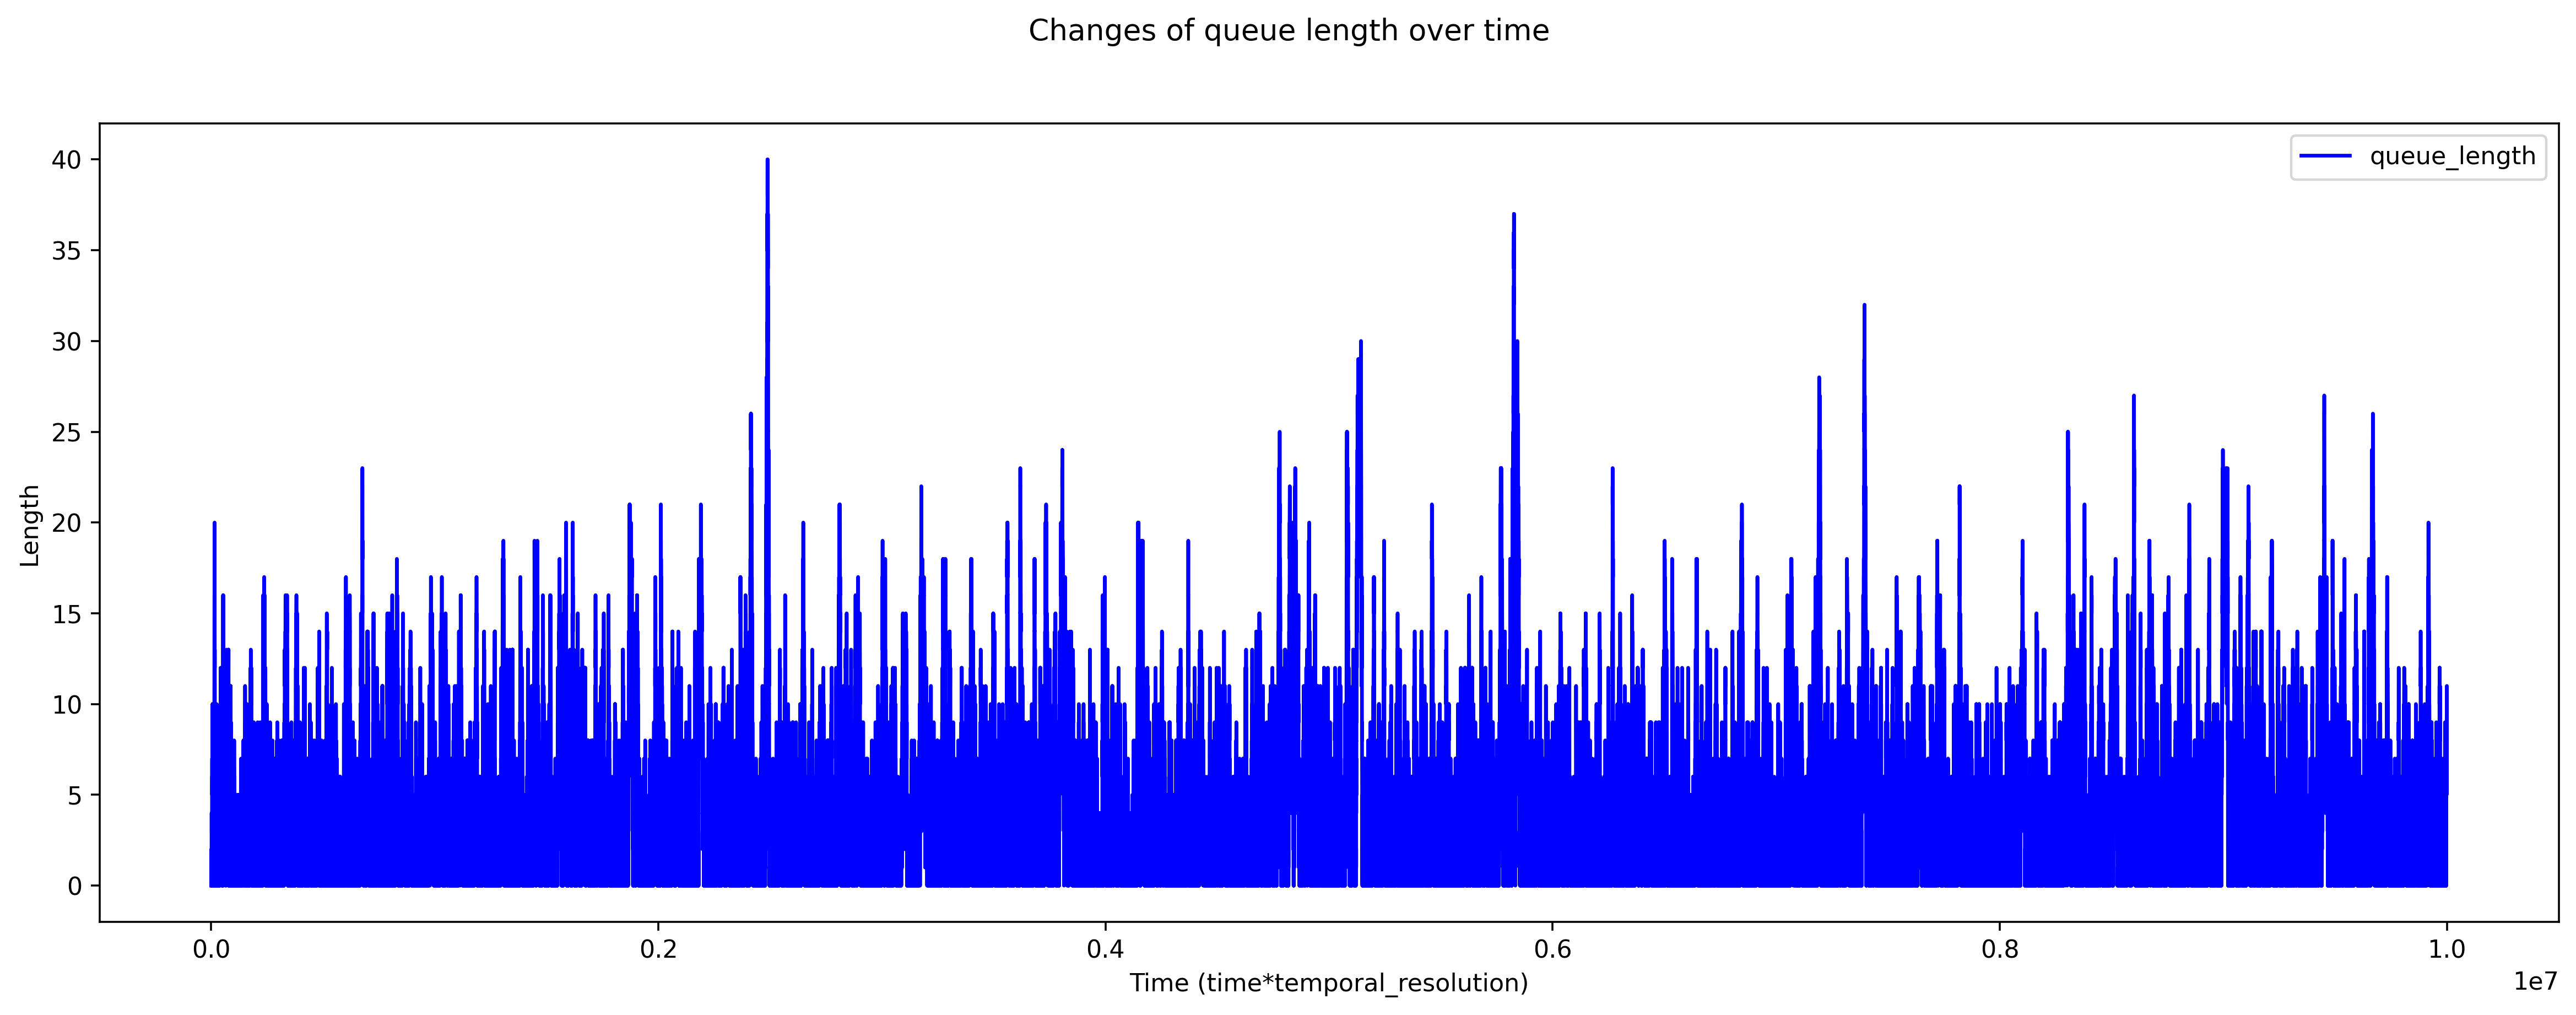

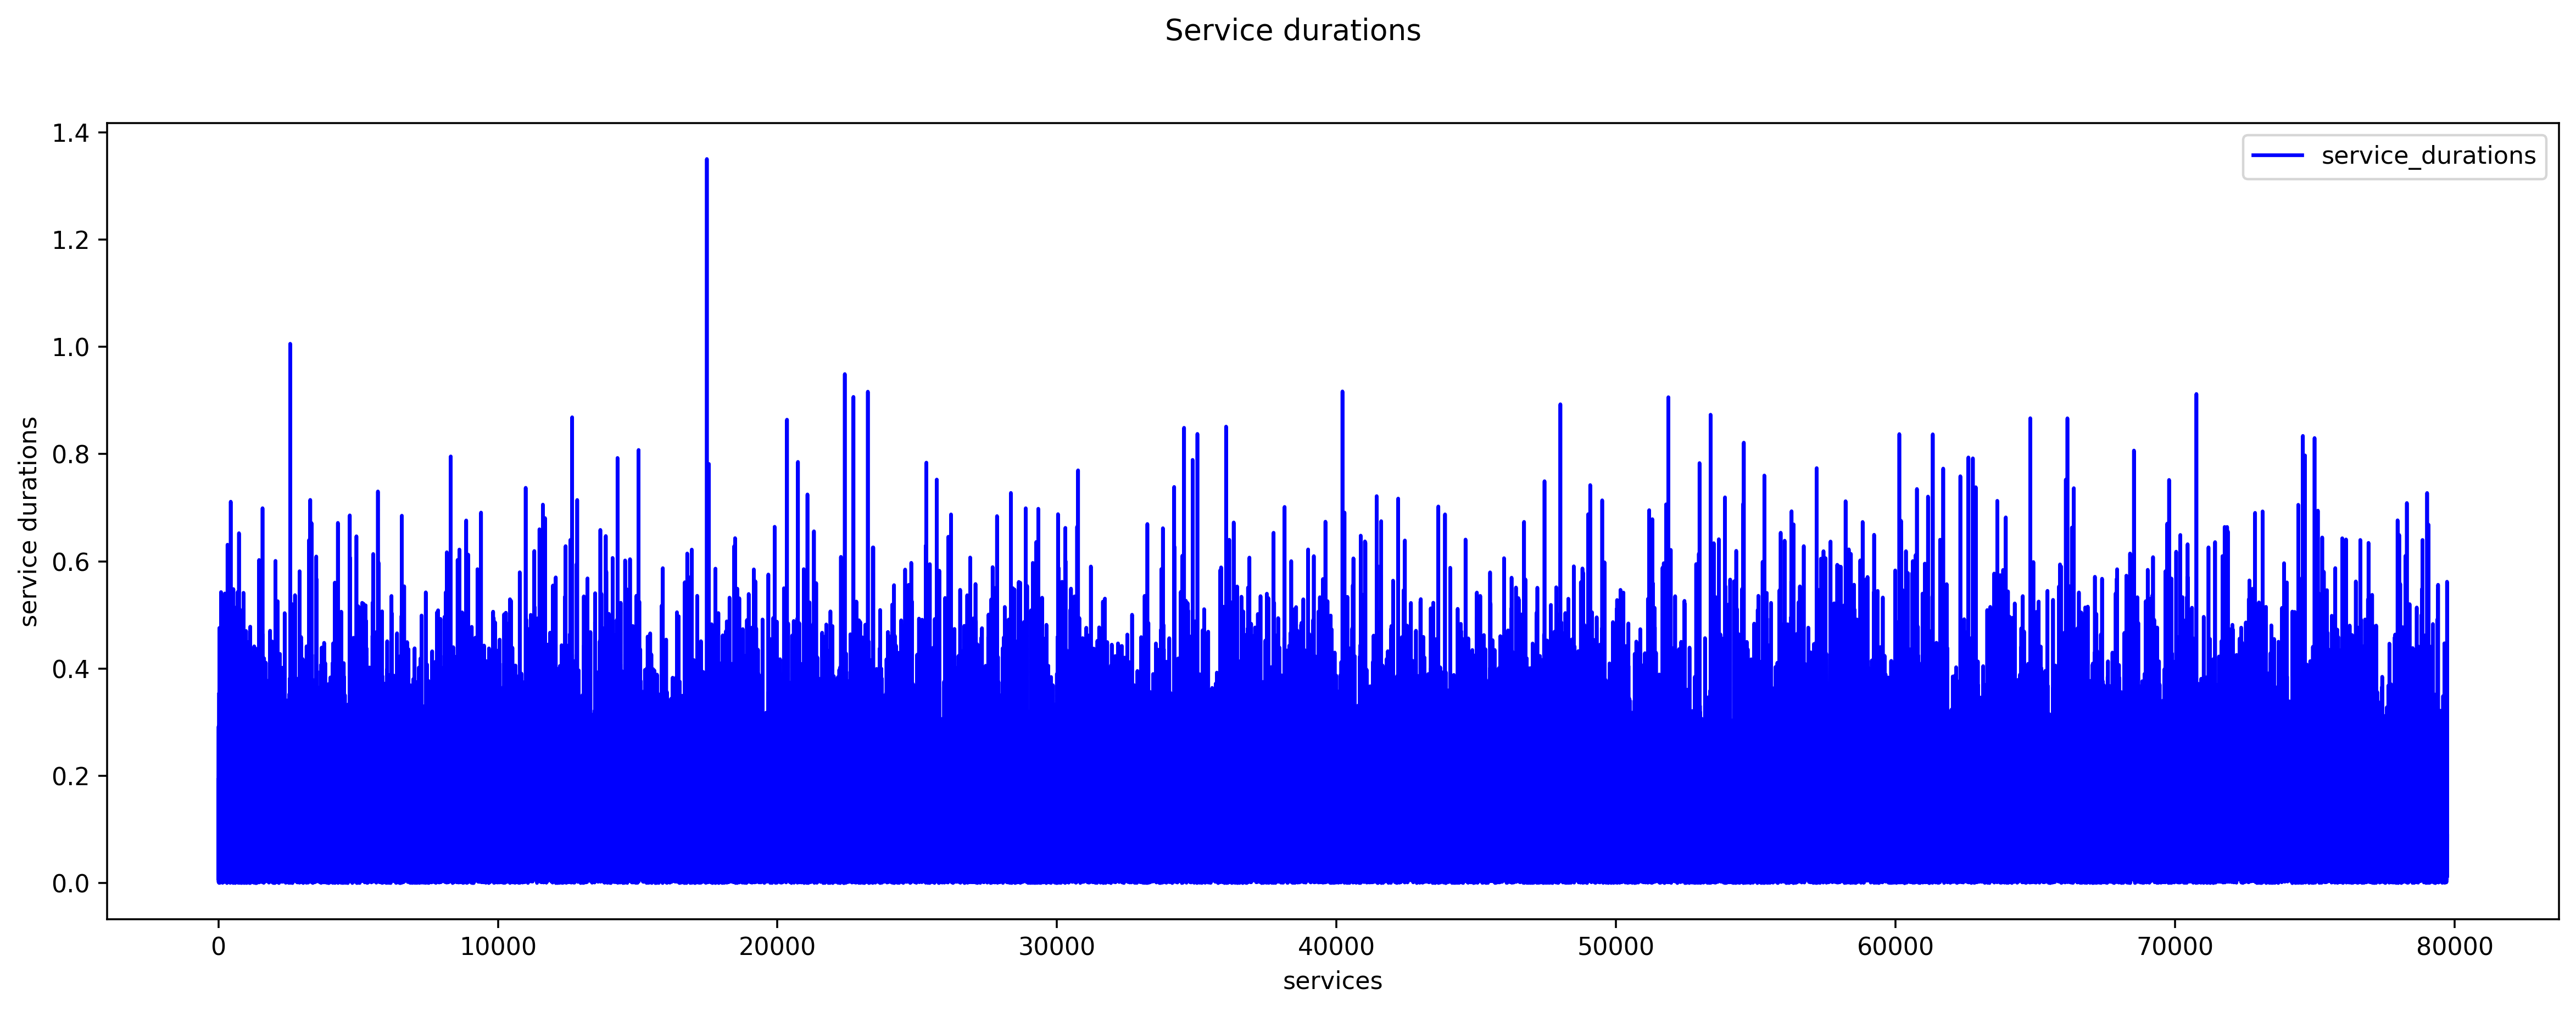

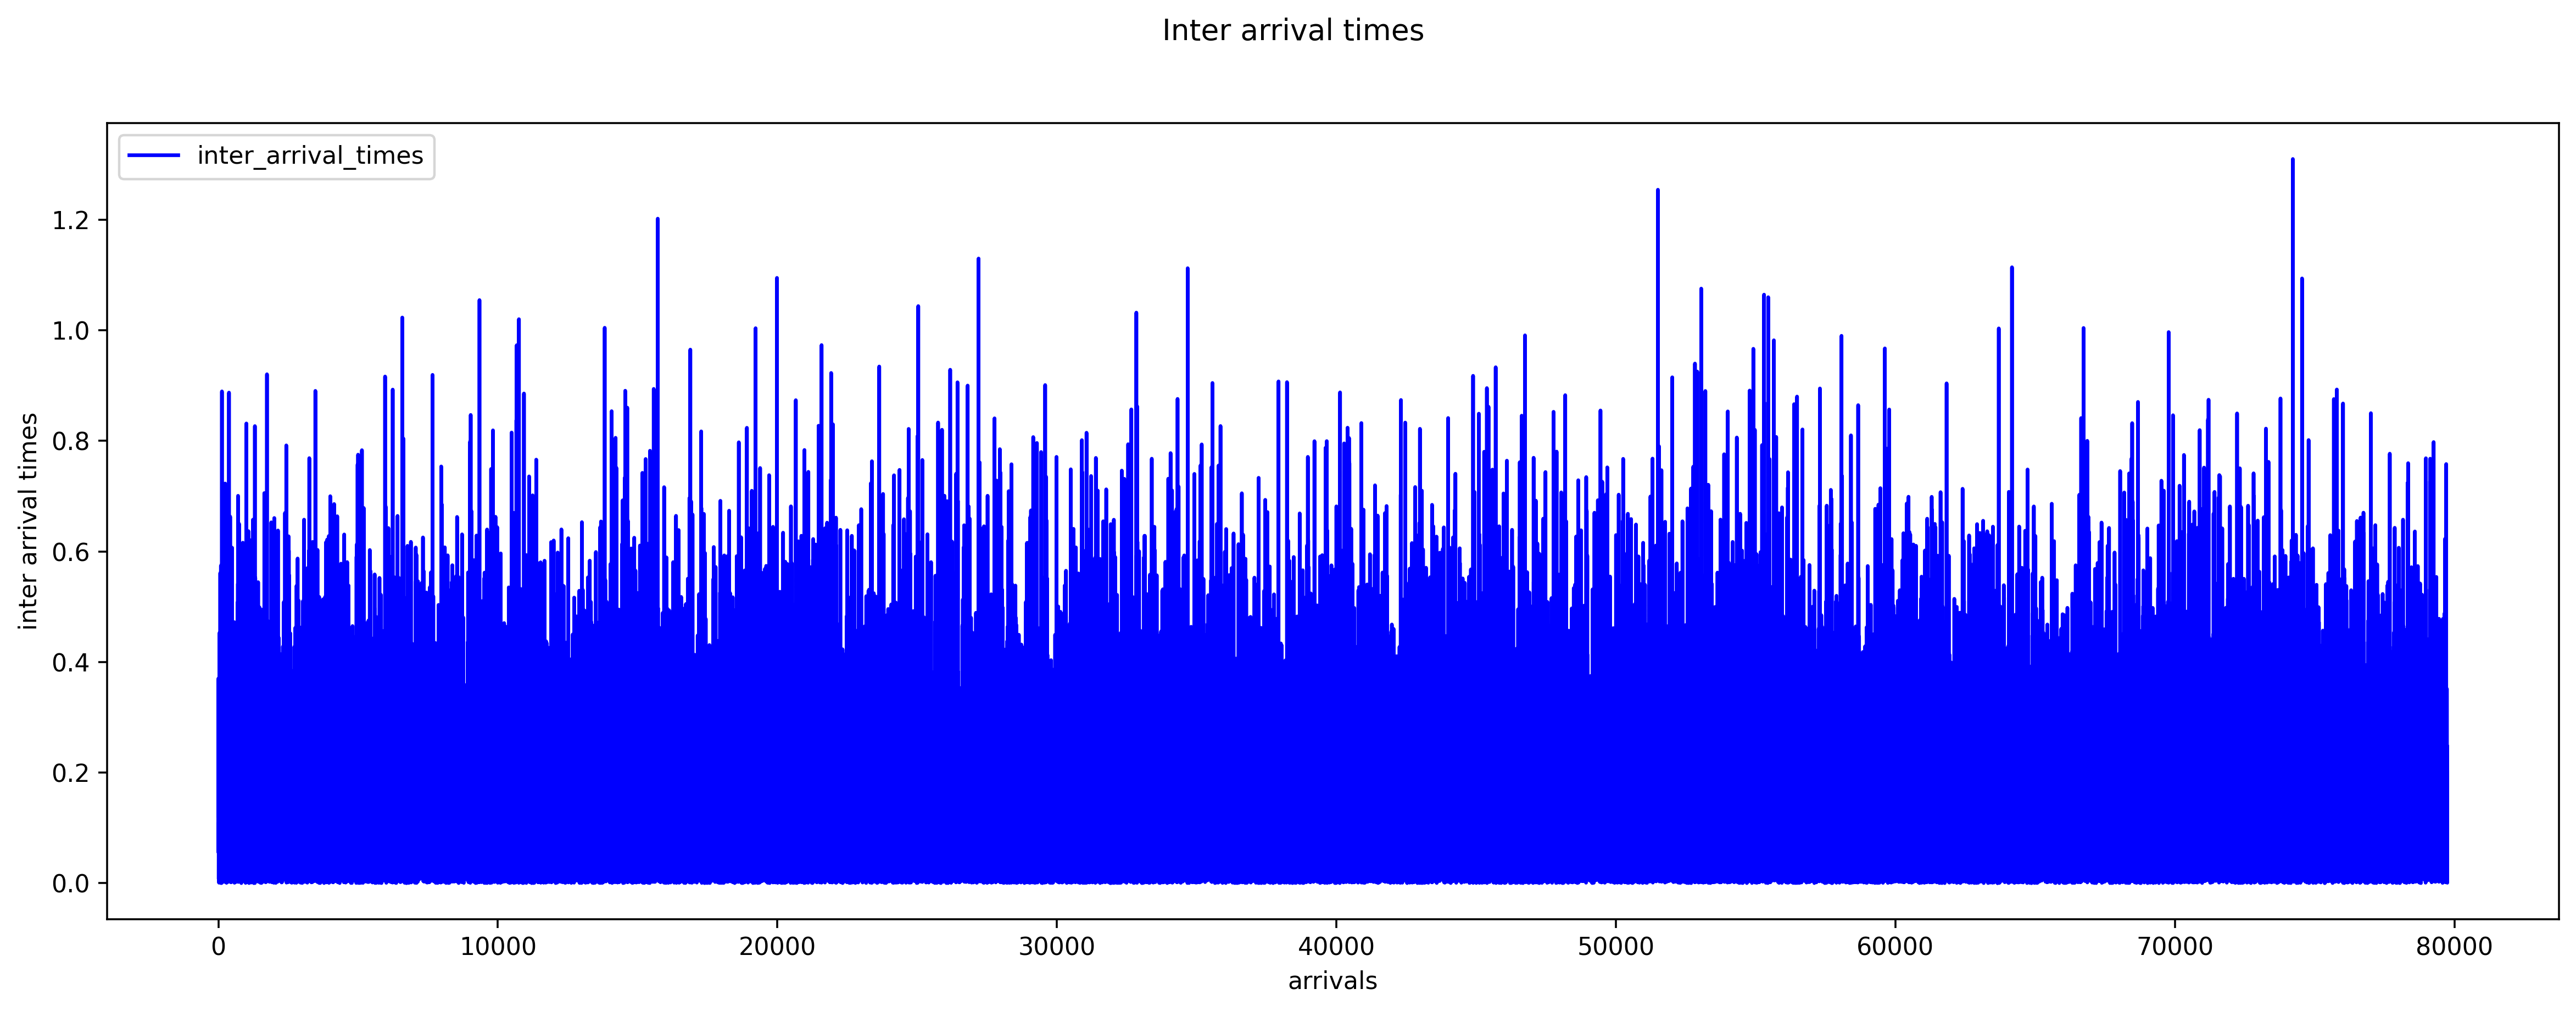

In [20]:
# plot the queue_length against time
fig = plt.figure(figsize=(18, 6), dpi=320)
fig.suptitle('Changes of queue length over time')
plot, = plt.plot(times, queue_lengths, 'b-', label='queue_length')
plt.legend(handles=[plot])
plt.xlabel('Time (time*temporal_resolution)') # need to consider the temporal resolution
plt.ylabel('Length')
plt.show()

# plot the service times
services = list(range(len(service_durations)))
fig = plt.figure(figsize=(18, 6), dpi=320)
fig.suptitle('Service durations')
plot, = plt.plot(services, service_durations, 'b-', label='service_durations')
plt.legend(handles=[plot])
plt.xlabel('services') # need to consider the temporal resolution
plt.ylabel('service durations')
plt.show()

# plot the inter arrival times
arrivals = list(range(len(inter_arrival_times)))
fig = plt.figure(figsize=(18, 6), dpi=320)
fig.suptitle('Inter arrival times')
plot, = plt.plot(arrivals, inter_arrival_times, 'b-', label='inter_arrival_times')
plt.legend(handles=[plot])
plt.xlabel('arrivals') # need to consider the temporal resolution
plt.ylabel('inter arrival times')
plt.show()

## (b)
Based on your simulation, plot Pn against n when λ = 8 and µ = 10.

[1970369, 1603359, 1281502, 1001313, 804398, 655243, 529836, 444533, 353370, 290670, 228222, 182497, 144084, 110858, 81945, 69081, 52400, 44948, 31273, 24040, 19536, 15300, 13364, 9416, 9638, 6693, 6344, 4216, 2107, 1169, 1142, 771, 1064, 210, 663, 1816, 1042, 615, 422, 370, 161]
[0.1970369, 0.1603359, 0.1281502, 0.1001313, 0.0804398, 0.0655243, 0.0529836, 0.0444533, 0.035337, 0.029067, 0.0228222, 0.0182497, 0.0144084, 0.0110858, 0.0081945, 0.0069081, 0.00524, 0.0044948, 0.0031273, 0.002404, 0.0019536, 0.00153, 0.0013364, 0.0009416, 0.0009638, 0.0006693, 0.0006344, 0.0004216, 0.0002107, 0.0001169, 0.0001142, 7.71e-05, 0.0001064, 2.1e-05, 6.63e-05, 0.0001816, 0.0001042, 6.15e-05, 4.22e-05, 3.7e-05, 1.61e-05]
1.0


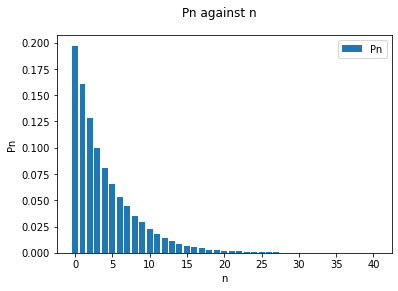

In [15]:
# calculate Pn
n = max(queue_lengths)+1
Cn = [0]*n
Pn = []
for data in queue_lengths:
    Cn[data] += 1
print(Cn)
for i in Cn:
    Pn.append(i/len(queue_lengths))
print(Pn)
print(sum(Pn))

# plot Pn against n
services = list(range(len(service_durations)))
fig = plt.figure()
fig.suptitle('Pn against n')
plot = plt.bar(list(range(n)), Pn, label='Pn')
plt.legend(handles=[plot])
plt.xlabel('n')
plt.ylabel('Pn')
plt.show()


## (c)
From your simulation, find the expected number of packets in your M/M/1 queueing
system when ρ = 8/10.


In [11]:
# calculate E[n] with data after the first 10 seconds
print("E[n]: ", statistics.mean(queue_lengths[10*temp_res:]))

E[n]:  3.9947683683683683


## (d)
 From your simulation, find the expected delay of packets in your M/M/1 queueing
system when ρ = 8/10. (IMPORTANT: For part (c) and part (d), you should NOT
use Little’s Law to derive the queue length or delay. Rather, you should collect them
directly from your simulation by averaging the suitable quantities over time or over
packets. You may however use Little’s Law to verify your results.)

In [12]:
#calculate E[w] with arrival_times and departure_times
delay = []
print("number of arrivals:", len(arrival_times), "\nnumber of departures:", len(departure_times))
for i in range(len(departure_times)):
    delay.append(departure_times[i] - arrival_times[i])
print("\nE[w]: ", statistics.mean(delay))

number of arrivals: 79745 
number of departures: 79734

E[w]:  0.5013609705563243
